In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
original_data = pd.read_csv("Output/best_original_omdb_dataframe.csv")
adapted_data = pd.read_csv("Output/best_adapted_omdb_dataframe.csv")
effects_data = pd.read_csv("Output/best_effects_omdb_dataframe.csv")

In [3]:
original_data

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error
0,0,Gone with the Wind,1939.0,Passed,17 Jan 1940,238 min,"Drama, History, Romance, War","Victor Fleming, George Cukor, Sam Wood","Margaret Mitchell (story of the old south ""Gon...","Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",...,8.1,"285,322",tt0031381,movie,NaN,NaN,Selznick International Pictures,NaN,True,NaN
1,1,Only Angels Have Wings,1939.0,Passed,25 May 1939,121 min,"Adventure, Drama, Romance",Howard Hawks,Jules Furthman (screen play),"Cary Grant, Jean Arthur, Richard Barthelmess, ...",...,7.7,"12,167",tt0031762,movie,NaN,NaN,Columbia Pictures Corporation,NaN,True,NaN
2,2,The Private Lives of Elizabeth and Essex,1939.0,Approved,11 Nov 1939,106 min,"Biography, Drama, History, Romance",Michael Curtiz,"Norman Reilly Raine (screen play), Æneas MacKe...","Bette Davis, Errol Flynn, Olivia de Havilland,...",...,7.1,"4,987",tt0031826,movie,NaN,NaN,Warner Brothers/Seven Arts,NaN,True,NaN
3,3,The Rains Came,1939.0,APPROVED,15 Sep 1939,103 min,"Adventure, Drama, Romance",Clarence Brown,"Philip Dunne (screen play), Julien Josephson (...","Myrna Loy, Tyrone Power, George Brent, Brenda ...",...,7.0,"1,377",tt0031835,movie,NaN,NaN,Twentieth Century Fox,NaN,True,NaN
4,4,Topper Takes a Trip,1938.0,Approved,12 Jan 1939,80 min,"Comedy, Fantasy, Romance",Norman Z. McLeod,"Jack Jevne (screen play), Eddie Moran (screen ...","Constance Bennett, Roland Young, Billie Burke,...",...,6.6,"1,026",tt0032043,movie,NaN,NaN,Hal Roach Studios Inc.,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,248,1917,2019.0,R,10 Jan 2020,119 min,"Drama, War",Sam Mendes,"Sam Mendes, Krysty Wilson-Cairns","Dean-Charles Chapman, George MacKay, Daniel Ma...",...,8.3,"372,646",tt8579674,movie,NaN,NaN,"Neal Street Productions, Amblin Entertainment",NaN,True,NaN
249,249,Avengers: Endgame,2019.0,PG-13,26 Apr 2019,181 min,"Action, Adventure, Drama, Sci-Fi","Anthony Russo, Joe Russo","Christopher Markus (screenplay by), Stephen Mc...","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",...,8.4,"762,149",tt4154796,movie,NaN,NaN,"Marvel Studios, Walt Disney Pictures",NaN,True,NaN
250,250,The Irishman,2019.0,R,27 Nov 2019,209 min,"Biography, Crime, Drama",Martin Scorsese,"Steven Zaillian (screenplay by), Charles Brand...","Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",...,7.9,"305,988",tt1302006,movie,NaN,NaN,Tribeca Productions,NaN,True,NaN
251,251,The Lion King,1994.0,G,24 Jun 1994,88 min,"Animation, Adventure, Drama, Family, Musical","Roger Allers, Rob Minkoff","Irene Mecchi (screenplay by), Jonathan Roberts...","Rowan Atkinson, Matthew Broderick, Niketa Cala...",...,8.5,"920,176",tt0110357,movie,NaN,NaN,Walt Disney Pictures,NaN,True,NaN


In [4]:
#drop null values for critical ratings
original_data = original_data.dropna(how = "any", subset=["Metascore"])
adapted_data = adapted_data.dropna(how = "any", subset=["Metascore"])
effects_data = effects_data.dropna(how = "any", subset=["Rated"])
effects_data = effects_data[effects_data.Rated != "Approved"]
effects_data = effects_data[effects_data.Rated != "APPROVED"]
effects_data = effects_data[effects_data.Rated != "Passed"]
effects_data = effects_data[effects_data.Rated != "Not Rated"]
effects_data

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error
6,6,The Wizard of Oz,1939.0,PG,25 Aug 1939,102 min,"Adventure, Family, Fantasy, Musical","Victor Fleming, George Cukor, Mervyn LeRoy, No...","Noel Langley (screenplay), Florence Ryerson (s...","Judy Garland, Frank Morgan, Ray Bolger, Bert Lahr",...,8.0,"366,764",tt0032138,movie,NaN,NaN,Metro Goldwyn Mayer,NaN,True,NaN
17,17,Swiss Family Robinson,1960.0,G,21 Dec 1960,126 min,"Adventure, Family",Ken Annakin,"Lowell S. Hawley (screenplay), Johann David Wy...","John Mills, Dorothy McGuire, James MacArthur, ...",...,7.2,"13,906",tt0054357,movie,NaN,NaN,Walt Disney Pictures,NaN,True,NaN
19,19,Typhoon,2005.0,R,14 Dec 2005,124 min,Action,Kyung-taek Kwak,Kyung-taek Kwak,"Dong-Gun Jang, Jung-jae Lee, Mi-yeon Lee, Davi...",...,5.8,"1,227",tt0475750,movie,NaN,NaN,NaN,NaN,True,NaN
25,25,The Invisible Woman,2013.0,R,21 Feb 2014,111 min,"Biography, Drama, History, Romance",Ralph Fiennes,"Abi Morgan, Claire Tomalin (book)","Felicity Jones, John Kavanagh, Tom Attwood, Su...",...,6.1,"9,185",tt1700845,movie,NaN,NaN,"Headline Pictures, Magnolia Mae",NaN,True,NaN
46,46,The Adventures of Mark Twain,1985.0,G,26 Jul 1985,86 min,"Animation, Adventure, Family, Fantasy, Sci-Fi",Will Vinton,"Susan Shadburne, Mark Twain (segment)","James Whitmore, Michele Mariana, Gary Krug, Ch...",...,7.4,"2,523",tt0088678,movie,NaN,NaN,NaN,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,Solo: A Star Wars Story,2018.0,PG-13,25 May 2018,135 min,"Action, Adventure, Sci-Fi",Ron Howard,"Jonathan Kasdan, Lawrence Kasdan, George Lucas...","Alden Ehrenreich, Joonas Suotamo, Woody Harrel...",...,6.9,"280,518",tt3778644,movie,NaN,NaN,Lucasfilm Ltd.,NaN,True,NaN
248,248,1917,2019.0,R,10 Jan 2020,119 min,"Drama, War",Sam Mendes,"Sam Mendes, Krysty Wilson-Cairns","Dean-Charles Chapman, George MacKay, Daniel Ma...",...,8.3,"372,646",tt8579674,movie,NaN,NaN,"Neal Street Productions, Amblin Entertainment",NaN,True,NaN
249,249,Avengers: Endgame,2019.0,PG-13,26 Apr 2019,181 min,"Action, Adventure, Drama, Sci-Fi","Anthony Russo, Joe Russo","Christopher Markus (screenplay by), Stephen Mc...","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",...,8.4,"762,149",tt4154796,movie,NaN,NaN,"Marvel Studios, Walt Disney Pictures",NaN,True,NaN
250,250,The Irishman,2019.0,R,27 Nov 2019,209 min,"Biography, Crime, Drama",Martin Scorsese,"Steven Zaillian (screenplay by), Charles Brand...","Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",...,7.9,"305,988",tt1302006,movie,NaN,NaN,Tribeca Productions,NaN,True,NaN


In [5]:
original_data['Metascore'] = pd.to_numeric(original_data["Metascore"])
original_data["imdbRating"] = pd.to_numeric(original_data["imdbRating"])
adapted_data["Metascore"] = pd.to_numeric(adapted_data["Metascore"])
adapted_data["imdbRating"] = pd.to_numeric(adapted_data["imdbRating"])
#get lines for plots
original_fit = np.polyfit(original_data.imdbRating, original_data.Metascore, 1)
adapted_fit = np.polyfit(adapted_data.imdbRating, adapted_data.Metascore, 1)

C:\Users\justi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\justi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


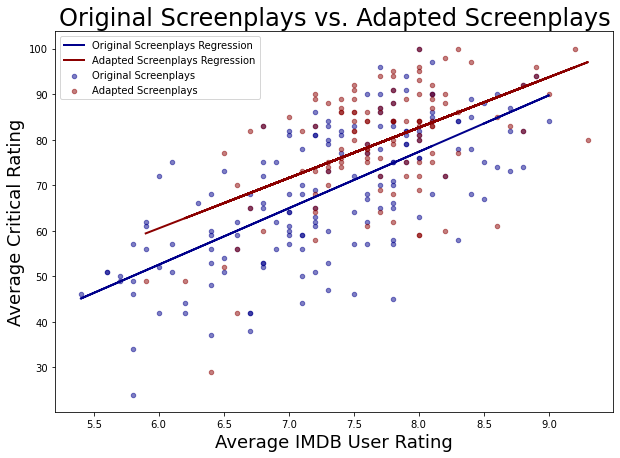

In [6]:
# Scatter plots
ax1 = original_data.plot(kind="scatter", x="imdbRating", y="Metascore", color="DarkBlue", alpha=0.5, figsize=(10, 7))
adapted_data.plot(kind="scatter", x="imdbRating", y="Metascore", color='DarkRed', alpha=0.5, figsize=(10, 7), ax=ax1)
# regression lines
plt.plot(original_data.imdbRating, original_fit[0] * original_data.imdbRating + original_fit[1], color="DarkBlue", linewidth=2)
plt.plot(adapted_data.imdbRating, adapted_fit[0] * adapted_data.imdbRating + adapted_fit[1], color="DarkRed", linewidth=2)
# legend title and labels
plt.legend(labels=["Original Screenplays Regression", "Adapted Screenplays Regression", "Original Screenplays", "Adapted Screenplays"])
plt.title("Original Screenplays vs. Adapted Screenplays", size=24)
plt.xlabel("Average IMDB User Rating", size=18)
plt.ylabel("Average Critical Rating", size=18)
plt.savefig("Output/original_vs_adapted.png")
plt.show()

In [7]:
effects_data["Rated"].unique()
effects_data

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error
6,6,The Wizard of Oz,1939.0,PG,25 Aug 1939,102 min,"Adventure, Family, Fantasy, Musical","Victor Fleming, George Cukor, Mervyn LeRoy, No...","Noel Langley (screenplay), Florence Ryerson (s...","Judy Garland, Frank Morgan, Ray Bolger, Bert Lahr",...,8.0,"366,764",tt0032138,movie,NaN,NaN,Metro Goldwyn Mayer,NaN,True,NaN
17,17,Swiss Family Robinson,1960.0,G,21 Dec 1960,126 min,"Adventure, Family",Ken Annakin,"Lowell S. Hawley (screenplay), Johann David Wy...","John Mills, Dorothy McGuire, James MacArthur, ...",...,7.2,"13,906",tt0054357,movie,NaN,NaN,Walt Disney Pictures,NaN,True,NaN
19,19,Typhoon,2005.0,R,14 Dec 2005,124 min,Action,Kyung-taek Kwak,Kyung-taek Kwak,"Dong-Gun Jang, Jung-jae Lee, Mi-yeon Lee, Davi...",...,5.8,"1,227",tt0475750,movie,NaN,NaN,NaN,NaN,True,NaN
25,25,The Invisible Woman,2013.0,R,21 Feb 2014,111 min,"Biography, Drama, History, Romance",Ralph Fiennes,"Abi Morgan, Claire Tomalin (book)","Felicity Jones, John Kavanagh, Tom Attwood, Su...",...,6.1,"9,185",tt1700845,movie,NaN,NaN,"Headline Pictures, Magnolia Mae",NaN,True,NaN
46,46,The Adventures of Mark Twain,1985.0,G,26 Jul 1985,86 min,"Animation, Adventure, Family, Fantasy, Sci-Fi",Will Vinton,"Susan Shadburne, Mark Twain (segment)","James Whitmore, Michele Mariana, Gary Krug, Ch...",...,7.4,"2,523",tt0088678,movie,NaN,NaN,NaN,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,Solo: A Star Wars Story,2018.0,PG-13,25 May 2018,135 min,"Action, Adventure, Sci-Fi",Ron Howard,"Jonathan Kasdan, Lawrence Kasdan, George Lucas...","Alden Ehrenreich, Joonas Suotamo, Woody Harrel...",...,6.9,"280,518",tt3778644,movie,NaN,NaN,Lucasfilm Ltd.,NaN,True,NaN
248,248,1917,2019.0,R,10 Jan 2020,119 min,"Drama, War",Sam Mendes,"Sam Mendes, Krysty Wilson-Cairns","Dean-Charles Chapman, George MacKay, Daniel Ma...",...,8.3,"372,646",tt8579674,movie,NaN,NaN,"Neal Street Productions, Amblin Entertainment",NaN,True,NaN
249,249,Avengers: Endgame,2019.0,PG-13,26 Apr 2019,181 min,"Action, Adventure, Drama, Sci-Fi","Anthony Russo, Joe Russo","Christopher Markus (screenplay by), Stephen Mc...","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",...,8.4,"762,149",tt4154796,movie,NaN,NaN,"Marvel Studios, Walt Disney Pictures",NaN,True,NaN
250,250,The Irishman,2019.0,R,27 Nov 2019,209 min,"Biography, Crime, Drama",Martin Scorsese,"Steven Zaillian (screenplay by), Charles Brand...","Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",...,7.9,"305,988",tt1302006,movie,NaN,NaN,Tribeca Productions,NaN,True,NaN


In [8]:
effects_data["Rated"] = effects_data["Rated"].replace(["TV-PG", "GP"], "PG")
colors = {"G":"green", "PG":"yellow", "PG-13":"blue", "R":"red"}

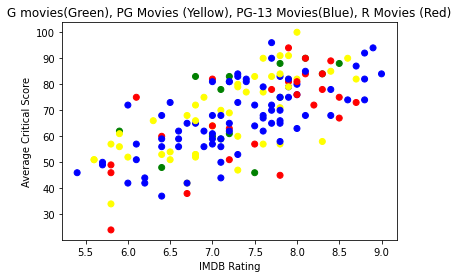

In [9]:
fig, ax = plt.subplots()
ax.scatter(effects_data["imdbRating"], effects_data["Metascore"], c=effects_data["Rated"].apply(lambda x: colors[x]))
plt.xlabel("IMDB Rating")
plt.ylabel("Average Critical Score")
plt.title("G movies(Green), PG Movies (Yellow), PG-13 Movies(Blue), R Movies (Red)")
plt.savefig("Output/effects.png")
plt.show()